<a href="https://colab.research.google.com/github/UPstartDeveloper/Problem_Solving_Practice/blob/master/DDI_q13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning and analyzing employee data

Question from <a href="www.interviewqs.com">Data Interview Qs</a> - sign up to receive a few DS questions/week via email.



---



Below is a snippet from a table that contains information about employees that work at Company XYZ:


In [ ]:
import pandas as pd
from datetime import datetime
from dateutil.parser import parse
import numpy as np
raw_data = {'employee_name': ['Andy', 'Beth', 'Cindy', "Dale"],
            'employee_id': [123456,789456,654123,963852],
            'date_joined': ['2015-02-15', np.nan, '2017-05-16', "2018-01-15"],
            'age': [45,36,34,25],
            'yrs_of_experience': [24,14,14,4]}
df = pd.DataFrame(raw_data, columns = ['employee_name', 'employee_id', 'date_joined','age', 'yrs_of_experience'])
df

,employee_name,employee_id,date_joined,age,yrs_of_experience
0,Andy,123456,2015-02-15,45,24
1,Beth,789456,NaN,36,14
2,Cindy,654123,2017-05-16,34,14
3,Dale,963852,2018-01-15,25,4


Company XYZ recently migrated database systems causing some of the date_joined records to be NULL. You're told by an analyst in human resources NULL records for the date_joined field indicates the employees joined prior to 2010. You also find out there are multiple employees with the same name and duplicate records for some employees.

**Question:** Can you write code using pandas that finds the number of employees that joined each month? You can group all of the NULL values as Dec 1, 2009. 

1. Restate the Problem:
  - so you want me to basically create a histogram - basically it'll show months as the buckets, and the number of new employees who joined in that month as the value in that bucket?

2. Clarifying Questions
- can we assume that new employees only join on the first of the month? --> no
- how would you like me to present the results? ---> assume a bar chart will work
- is there a specific time range I should show on the bar plot, or do we only care about the months founds in the dataset? ---> only those represented?
- can we assume that each employee has a unique id? and that there are no Nans in this column? ---> yes
- do months of different years get counted differently? --> yes
- do the months need to be sequentially sorted? ---> yes


3. THINK

Intuition:
- if I was to do this on the example input given, the output would be:
    ```
    December '09 : 1,
    Feb '15 : 1,
    May '17 : 1,
    Jan '18 : 1
    ```


- Approach
  - iterate over the date_joined col, keep a count of the number of employees that were found to join in each month
    - date time parsing?
    - telling the difference between same names --> different or new employee?

  - after words --> probably store it in a pandas df, and then just plot it?



---



In [ ]:
def replace_null(date):
  if date == np.nan:
    return '2009-12-1'
  else:
    return date


def visualize_new_employee_join_dates(df: pd.DataFrame):
  # A: slice DF to get date_joined and employee id cols (just the unique rows)
  new_employees = df[['employee_id','date_joined']]
  # B: replace all the nulls with dt equivalent of December 1, 2009
  new_employees['date_joined'] = new_employees['date_joined'].fillna('2009-12-1')
  # C: sort the rows of the slice sequentially by date_joined
  new_employees = new_employees.sort_values(by='date_joined')
  # D: drop duplicate rows by the employee id
  new_employees.drop_duplicates(subset=['employee_id'], keep='first')
  # E: make a histogram from the value_counts wof the date_joined column
  new_employees_by_month = new_employees['date_joined'].hist()
  return new_employees_by_month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


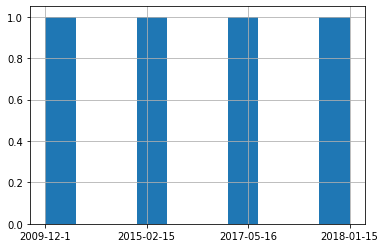

In [ ]:
new_employees_by_month = visualize_new_employee_join_dates(df)
new_employees_by_month

<a href="https://www.interviewqs.com/signup">Upgrade to premium</a> to receive in-depth solutions to each problem.